<a href="https://colab.research.google.com/github/HUGOBROWNING/Canadian-Pension-Plan/blob/main/Bank_marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
data = pd.read_csv('/content/bank-additional-full.csv', delimiter = ';')
data.head(6)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
data.shape

(41188, 21)

In [15]:
data = data.dropna()
data = data.drop_duplicates()
data.shape

(41176, 21)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Column,Actual,Predicted,Accuracy Score
0,default,"[no, no, no, no, no, no, no, no, no, no]","[no, no, no, no, no, no, no, no, no, no]",1
1,y,"[yes, no, yes, no, no, no, no, no, no, no]","[yes, no, no, no, no, no, no, no, no, no]",1
2,marital,"[married, married, married, married, single, s...","[married, married, single, married, single, ma...",1


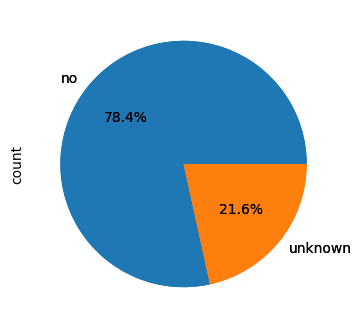

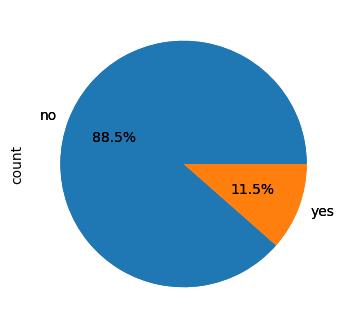

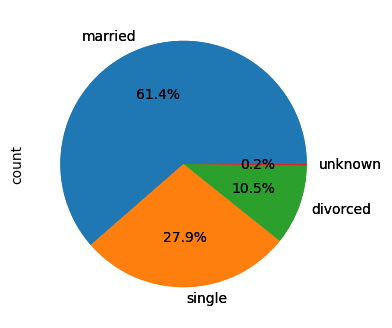

In [62]:
from math import log
classification_list = [data.columns[4], data.columns[20], 'marital']
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
num_cols = data.select_dtypes(include = 'number').columns.tolist()
cat_cols = data.select_dtypes(include ='object').columns.tolist()
c = []
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
for i in cat_cols:
  if i not in classification_list:
    c.append(i)
cat_cols = c
pre = ColumnTransformer(
    transformers = [
        ('Nums', StandardScaler(), num_cols),
        ('Cats', OneHotEncoder(), cat_cols)
    ]
)
predictions = []
for n in data[classification_list]:
  pre = ColumnTransformer(
    transformers = [
        ('Nums', StandardScaler(), num_cols),
        ('Cats', OneHotEncoder(), cat_cols)
    ]
  )
  model = Pipeline(
      steps =[
          ('Preprocessing', pre),
          ('Classification', LogisticRegression())
      ]
  )
  X = data.drop(columns = [n], axis = 1)
  y = data[n]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  predictions.append({
      'Column': n,
      'Actual': list(y_test[:10]),
      'Predicted': list(y_pred[:10]),
      'Accuracy Score': (round(accuracy_score(y_test, y_pred)))
  })
  acc_counts = pd.Series(y_test).value_counts()
  pred_counts = pd.Series(y_test).value_counts()
  fig, axes = plt.subplots(figsize=(4, 4))
  acc_counts.plot(kind = 'pie', autopct='%1.1f%%')
  pred_counts.plot(kind = 'pie', autopct='%1.1f%%')
pred = pd.DataFrame(predictions)
pred